In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import asarray
from numpy import savetxt


In [2]:
df1=pd.read_csv("G:/Machine Learning/Titanic_Dataset/train.csv")
df1.shape

test_df=pd.read_csv("G:/Machine Learning/Titanic_Dataset/test.csv")
test_df.shape


(418, 11)

In [3]:
df1.head()
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df2=df1.drop(    columns=["Name","Ticket","Cabin"]
)

##test_df=test_df.drop(columns=["Name","Ticket","Cabin"])

In [5]:
df2.head()
##test_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [6]:
def Crete_alone(df):
    x,y=df.shape
    for a in range(x):
        if ((df.loc[a,"SibSp"])==0 and (df.loc[a,"Parch"])==0):
            df.set_value(a, 'Alone', 1) 
        else:
            df.set_value(a, 'Alone', 0)
        
    return df

df3=Crete_alone(df2)


C:\Users\prince\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\prince\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [7]:
df3.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone
0,1,0,3,male,22.0,1,0,7.2500,S,0.0
1,2,1,1,female,38.0,1,0,71.2833,C,0.0
2,3,1,3,female,26.0,0,0,7.9250,S,1.0
3,4,1,1,female,35.0,1,0,53.1000,S,0.0
4,5,0,3,male,35.0,0,0,8.0500,S,1.0


In [8]:
df3.groupby('Pclass')['Pclass'].agg('count')

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

In [9]:
#df3[(df3['Pclass']==3) & (df3['Survived']==0) & (df3['Sex']=='male')].head()

In [10]:
y=df3.loc[:,'PassengerId']
Female=[]
Male=[]
Female_notsurvived=[]
Male_notsurvived=[]

In [11]:
Female_Survived_1=df3[(df3['Pclass']==1) & (df3['Survived']==1) & (df3['Sex']=='female')].shape[0]
Female_Survived_2=df3[(df3['Pclass']==2) & (df3['Survived']==1) & (df3['Sex']=='female')].shape[0]
Female_Survived_3=df3[(df3['Pclass']==3) & (df3['Survived']==1) & (df3['Sex']=='female')].shape[0]
male_Survived_1=df3[(df3['Pclass']==1) & (df3['Survived']==1) & (df3['Sex']=='male')].shape[0]
male_Survived_2=df3[(df3['Pclass']==2) & (df3['Survived']==1) & (df3['Sex']=='male')].shape[0]
male_Survived_3=df3[(df3['Pclass']==3) & (df3['Survived']==1) & (df3['Sex']=='male')].shape[0]



Female_notSurvived_1=df3[(df3['Pclass']==1) & (df3['Survived']==0) & (df3['Sex']=='female')].shape[0]
Female_notSurvived_2=df3[(df3['Pclass']==2) & (df3['Survived']==0) & (df3['Sex']=='female')].shape[0]
Female_notSurvived_3=df3[(df3['Pclass']==3) & (df3['Survived']==0) & (df3['Sex']=='female')].shape[0]
male_notSurvived_1=df3[(df3['Pclass']==1) & (df3['Survived']==0) & (df3['Sex']=='male')].shape[0]
male_notSurvived_2=df3[(df3['Pclass']==2) & (df3['Survived']==0) & (df3['Sex']=='male')].shape[0]
male_notSurvived_3=df3[(df3['Pclass']==3) & (df3['Survived']==0) & (df3['Sex']=='male')].shape[0]

In [12]:
Female=[Female_Survived_1,Female_Survived_2,Female_Survived_3]
Male=[male_Survived_1,male_Survived_2,male_Survived_3]

Female_notsurvived=[Female_notSurvived_1,Female_notSurvived_2,Female_notSurvived_3]
Male_notsurvived=[male_notSurvived_1,male_notSurvived_2,male_notSurvived_3]


In [13]:
print(Female)
print(Male)
print(Female_notsurvived)
print(Male_notsurvived)

[91, 70, 72]
[45, 17, 47]
[3, 6, 72]
[77, 91, 300]


In [14]:
#F_class=['f_1St','f_2nd','f_3rd']
Class=['1St','2nd','3rd']
y_pos=np.arange(len(Class))

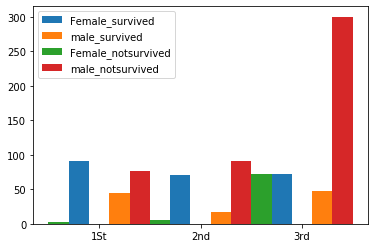

In [15]:

plt.xticks(y_pos,Class)
plt.bar(y_pos-0.2,Female,width=0.2,label='Female_survived')
plt.bar(y_pos+0.2,Male,width=0.2,label='male_survived')


plt.xticks(y_pos,Class)
plt.bar(y_pos-0.4,Female_notsurvived,width=0.2,label='Female_notsurvived')
plt.bar(y_pos+0.4,Male_notsurvived,width=0.2,label='male_notsurvived')
plt.legend()

plt.show()

In [16]:
df3.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone
0,1,0,3,male,22.0,1,0,7.2500,S,0.0
1,2,1,1,female,38.0,1,0,71.2833,C,0.0
2,3,1,3,female,26.0,0,0,7.9250,S,1.0
3,4,1,1,female,35.0,1,0,53.1000,S,0.0
4,5,0,3,male,35.0,0,0,8.0500,S,1.0


In [17]:
df3["Age"].max()

80.0

In [18]:
df3["Age"].min()

0.42

In [19]:
df4=df3.set_value(803,'Age',1)

C:\Users\prince\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


In [20]:
print(df4["Age"].min())
print(df4["Age"].max())

0.67
80.0


In [21]:
df4.loc[df4["Age"]<=1,"Age"]=1

In [22]:
df4.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone
0,1,0,3,male,22.0,1,0,7.2500,S,0.0
1,2,1,1,female,38.0,1,0,71.2833,C,0.0
2,3,1,3,female,26.0,0,0,7.9250,S,1.0
3,4,1,1,female,35.0,1,0,53.1000,S,0.0
4,5,0,3,male,35.0,0,0,8.0500,S,1.0


In [23]:
#df4[(df4["Embarked"]=='S') & (df4["Survived"]==0)].shape[0]

In [24]:
#df4[(df4["Embarked"]=='C') & (df4["Survived"]==0)].shape[0]

In [25]:
df4["Embarked"].unique()


array(['S', 'C', 'Q', nan], dtype=object)

In [26]:
df4[(df4["Embarked"]=='Q') & (df4["Survived"]==0)].shape[0]

47

In [27]:
#df4["Embarked"].describe()

In [28]:
dummies=pd.get_dummies(df4["Embarked"])
#dummies


In [29]:
df5=pd.concat([df4,dummies],axis='columns')
df5.head()



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone,C,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,0.0,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0.0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,1.0,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0.0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1.0,0,0,1


In [30]:
df6=df5.drop(columns=["Embarked"])


Male=0
Female=1

In [31]:
def Gender(df):
    x=df.shape[0]
    for a in range(x):
        if ((df.loc[a,"Sex"])=='male'):
            df.set_value(a, 'Gender', 0)
        else:
            df.set_value(a,'Gender',1)
    return df
df7=Gender(df6)
test_df.head()
#test_df=Gender(test_df)
#test_df.shape

C:\Users\prince\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\Users\prince\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
df7["Pclass*Fare"]=df7["Pclass"]*df7["Fare"]
df7.head(25)



,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Alone,C,Q,S,Gender,Pclass*Fare
0,1,0,3,male,22.0,1,0,7.2500,0.0,0,0,1,0.0,21.7500
1,2,1,1,female,38.0,1,0,71.2833,0.0,1,0,0,1.0,71.2833
2,3,1,3,female,26.0,0,0,7.9250,1.0,0,0,1,1.0,23.7750
3,4,1,1,female,35.0,1,0,53.1000,0.0,0,0,1,1.0,53.1000
4,5,0,3,male,35.0,0,0,8.0500,1.0,0,0,1,0.0,24.1500
5,6,0,3,male,NaN,0,0,8.4583,1.0,0,1,0,0.0,25.3749
6,7,0,1,male,54.0,0,0,51.8625,1.0,0,0,1,0.0,51.8625
7,8,0,3,male,2.0,3,1,21.0750,0.0,0,0,1,0.0,63.2250
8,9,1,3,female,27.0,0,2,11.1333,0.0,0,0,1,1.0,33.3999
9,10,1,2,female,14.0,1,0,30.0708,0.0,1,0,0,1.0,60.1416


In [33]:
#df7[(df7["Fare"]>150)].shape[0]
#df7[(df7["Fare"]>150) &(df7["Survived"]==0)& (df7["Sex"]=='male')].shape[0]
#df7.sort_values(by="Fare").head(50)
#df7[df7["Alone"]==1]
df8=df7.drop(columns=["PassengerId","Sex"])


In [34]:
#df7.sort_values(by="Age")
#df7["Age"].isnull().sum()

In [35]:
#df8[(df8["Age"].isnull()) & (df8["Survived"]==0)]


In [36]:
avg=df8["Age"].mean()
avg=int(avg)

#avg
#df8["Fare"]=df8["Fare"]
#from sklearn.preprocessing import MinMaxScaler,StandardScaler
#scaling=StandardScaler()
#df8["Fare"]=scaling.fit_transform(df8[["Fare"]])


from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaling=StandardScaler()
df8["Fare"]=scaling.fit_transform(df8[["Fare"]])

In [37]:
df8["Age"].fillna(avg, inplace = True)
#df8["Age"].isnull().sum()



In [38]:
x=df8.drop({'Survived'},axis='columns')
print(x.head())
y=df8["Survived"]
y.head()

   Pclass   Age  SibSp  Parch     Fare  Alone  C  Q  S  Gender  Pclass*Fare
0       3  22.0      1      0   7.2500    0.0  0  0  1     0.0      21.7500
1       1  38.0      1      0  71.2833    0.0  1  0  0     1.0      71.2833
2       3  26.0      0      0   7.9250    1.0  0  0  1     1.0      23.7750
3       1  35.0      1      0  53.1000    0.0  0  0  1     1.0      53.1000
4       3  35.0      0      0   8.0500    1.0  0  0  1     0.0      24.1500


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)


## LogisticRegression

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
score = model.score(x_test, y_test)
print(score)



0.8156424581005587


C:\Users\prince\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
print(model.coef_)
print(x_train.columns)
#importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round((model.coef_).reshape(1,7),3)})
#importances = importances.sort_values('importance',ascending=False).set_index('feature')
#importances.head(15)

[[-0.96197441 -0.0267177  -0.69813084 -0.33999729 -0.00881298 -0.71023303
   0.70340267  0.57969382  0.17129141  2.55242439  0.01108322]]
Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Alone', 'C', 'Q', 'S',
       'Gender', 'Pclass*Fare'],
      dtype='object')


In [42]:
test_df=pd.read_csv("G:/Machine Learning/Titanic_Dataset/test.csv")
test_df=test_df.drop(columns=["Name","Ticket","Cabin"])
test_df=Crete_alone(test_df)
print(test_df.shape)
dummies_test=pd.get_dummies(test_df["Embarked"])
test_df=pd.concat([test_df,dummies_test],axis='columns')
test_df=test_df.drop(columns=["Embarked"])

print(test_df.shape)

test_df=Gender(test_df)

print(test_df.shape)
test_df.head(25)
test_df=test_df.drop(columns=["PassengerId","Sex"])
avg_test=test_df["Age"].mean()


avg_test=int(avg_test)
test_df["Age"].fillna(avg_test,inplace=True)

test_df.head()

avg_Fare=test_df["Fare"].mean()
print(avg_Fare)
test_df["Fare"].fillna(avg_Fare,inplace=True)
test_df["Pclass*Fare"]=test_df["Pclass"]*test_df["Fare"]

#test_final=test_df.drop({'C','Q','S','SibSp'},axis='columns')
#test_final.head(25)

#test_final.shape
Ans=model.predict(test_df)
print(Ans)


(418, 9)
(418, 11)
(418, 12)
35.6271884892086
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


C:\Users\prince\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\Users\prince\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


In [43]:
print(Ans)
print(Ans.shape)
#print(type(Ans))
data = asarray(Ans)
# save to csv file
#savetxt('G:/Machine Learning/Submision_Harsh1.csv', data, delimiter=',')

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
(418,)


In [44]:
#output=pd.read_csv("G:/Machine Learning/Submision_1.csv")
#output.head(10)
#output["Survived"]=output["Survived"].astype(int)


## DecisionTree Algoritham

In [45]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(x_train,y_train)
#score=classifier.score(x_test,y_test)

print(score)

0.8156424581005587


## KNN Algoritham

In [46]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(x_train, y_train)
score=neigh.score(x_test,y_test)
print(score)

0.7262569832402235


## Random Forest Algoritham

In [47]:
from sklearn.tree import DecisionTreeClassifier

# Make a decision tree and train
tree = DecisionTreeClassifier()
model_tree=tree.fit(x_train, y_train)

score=model_tree.score(x_test,y_test)
print(score)


0.7821229050279329


In [48]:
Ans1=model_tree.predict(test_df)


In [50]:
data = asarray(Ans1)
#savetxt('G:/Machine Learning/Submision_Harsh_Randomforest.csv', data, delimiter=',')
#df.head()

In [51]:
#output1=pd.read_csv("G:/Machine Learning/Submision_Harsh_Randomforest.csv")
#output1.head(10)
#output1["Survived"]=output1["Survived"].astype(int)

## SVM

In [52]:
from sklearn.svm import SVC
model_svm=SVC()
model_svm.fit(x_train,y_train)
score=model.score(x_test,y_test)
print(score)

0.8156424581005587


C:\Users\prince\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [55]:
Ans_svm=model_svm.predict(test_df)
df=pd.DataFrame({
                "Survived":Ans_svm})
df.to_csv("G:/Machine Learning/Titanic_Dataset/Submision1_SVM.csv")

In [56]:
df1=pd.read_csv("G:/Machine Learning/Titanic_Dataset/Submision1_SVM.csv")

In [57]:
df1.head(25)

,Unnamed: 0,Survived
0,0,0
1,1,0
2,2,1
3,3,0
4,4,1
5,5,0
6,6,1
7,7,1
8,8,0
9,9,0


## Neural Network

In [58]:
from sklearn.neural_network import MLPClassifier

In [62]:
clf=MLPClassifier(activation='tanh',warm_start=True,max_iter=150,hidden_layer_sizes=(120,))

In [63]:
clf.fit(x_train,y_train)

C:\Users\prince\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(120,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=150, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=True)

In [64]:
clf.score(x_test,y_test)

0.7932960893854749